In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [2]:
# Loading the dataset
df = pd.read_csv('nyc-rolling-sales.csv')

In [3]:
df.head(2)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00


In [4]:
# Printing the shape
print(df.shape)

(84548, 22)


In [5]:
# Dropping Unnecessary columns
del df['EASE-MENT']
del df['Unnamed: 0']
del df['SALE DATE']



In [6]:
df.head(2)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-


In [7]:
# Deleting the Duplicates
df = df.drop_duplicates(df.columns, keep='last')
sum(df.duplicated(df.columns))

0

In [8]:
df.shape

(83190, 19)

In [9]:
# Converting some columns to appropriate datatype
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['BOROUGH'] = df['BOROUGH'].astype('category')

In [10]:
# Checking missing values

df.columns[df.isnull().any()]

Index(['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE'], dtype='object')

In [11]:
# Fill missing values with mean values.

df['LAND SQUARE FEET']=df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].mean())
df['GROSS SQUARE FEET']=df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].mean())

In [14]:
df.columns[df.isnull().any()]

Index(['SALE PRICE'], dtype='object')

In [12]:
# Splitting dataset based on missing values 
test = df[df['SALE PRICE'].isna()]
df = df[~df['SALE PRICE'].isna()]

In [13]:
print(test.shape)

(13909, 19)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69281 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         69281 non-null  category
 1   NEIGHBORHOOD                    69281 non-null  object  
 2   BUILDING CLASS CATEGORY         69281 non-null  object  
 3   TAX CLASS AT PRESENT            69281 non-null  category
 4   BLOCK                           69281 non-null  int64   
 5   LOT                             69281 non-null  int64   
 6   BUILDING CLASS AT PRESENT       69281 non-null  object  
 7   ADDRESS                         69281 non-null  object  
 8   APARTMENT NUMBER                69281 non-null  object  
 9   ZIP CODE                        69281 non-null  int64   
 10  RESIDENTIAL UNITS               69281 non-null  int64   
 11  COMMERCIAL UNITS                69281 non-null  int64   
 12  TOTAL UNITS       

In [16]:
df.head(2)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0


<AxesSubplot:>

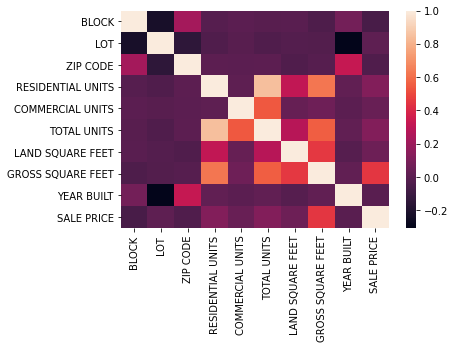

In [15]:
# Finding correlation between the features

corr_matrix = df.corr()
sns.heatmap(corr_matrix)

In [17]:
# Numeric correlation
corr_matrix['SALE PRICE'].sort_values(ascending=False)

SALE PRICE           1.000000
GROSS SQUARE FEET    0.449913
TOTAL UNITS          0.126654
RESIDENTIAL UNITS    0.122566
LAND SQUARE FEET     0.060143
COMMERCIAL UNITS     0.044535
LOT                  0.012266
YEAR BUILT          -0.003779
ZIP CODE            -0.034110
BLOCK               -0.061357
Name: SALE PRICE, dtype: float64

In [18]:
# Storing the numeric data
numeric_data=df.select_dtypes(include=[np.number])
numeric_data.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,69281.000000,69281.000000,69281.000000,69281.000000,69281.000000,69281.000000,6.928100e+04,6.928100e+04,69281.000000,6.928100e+04
mean,4200.305437,374.983473,10739.919458,1.870859,0.164244,2.055109,3.643061e+03,3.640300e+03,1800.113451,1.286521e+06
std,3434.828427,656.820333,1265.389144,14.317577,9.018311,17.026435,3.322172e+04,2.427118e+04,519.752668,1.145690e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1349.000000,21.000000,10306.000000,0.000000,0.000000,0.000000,1.900000e+03,1.268000e+03,1920.000000,2.350000e+05
50%,3377.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.970000e+03,2.400000e+03,1938.000000,5.350000e+05
75%,6192.000000,879.000000,11249.000000,2.000000,0.000000,2.000000,3.858418e+03,3.891878e+03,1965.000000,9.500000e+05
max,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,2.210000e+09


In [19]:
# Checking Total Units, Commercial Units, Residential Units
df[["TOTAL UNITS", "SALE PRICE"]].groupby(['TOTAL UNITS'], as_index=False).count().sort_values(by='SALE PRICE', ascending=False)

,TOTAL UNITS,SALE PRICE
1,1,30435
0,0,17563
2,2,12931
3,3,4415
4,4,1256
...,...,...
114,136,1
113,135,1
112,132,1
111,130,1


In [21]:
df = df[(df['TOTAL UNITS'] > 0) & (df['TOTAL UNITS'] != 2261)]
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0


In [22]:
df.shape

(51717, 19)

In [23]:
# Remove observations that fall outside Sale Price caps

df = df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 5000000)]

<AxesSubplot:xlabel='GROSS SQUARE FEET'>

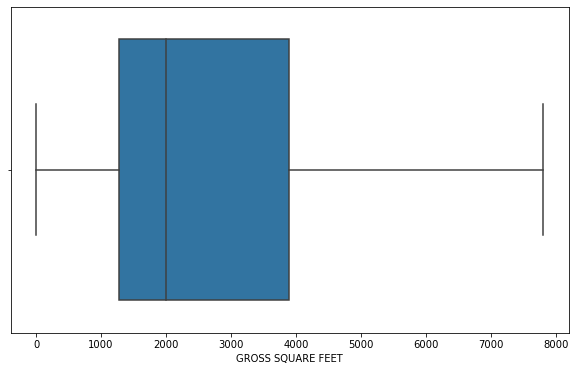

In [24]:
# Square Feet Plots

plt.figure(figsize=(10,6))
sns.boxplot(x='GROSS SQUARE FEET', data=df,showfliers=False)

<AxesSubplot:xlabel='LAND SQUARE FEET'>

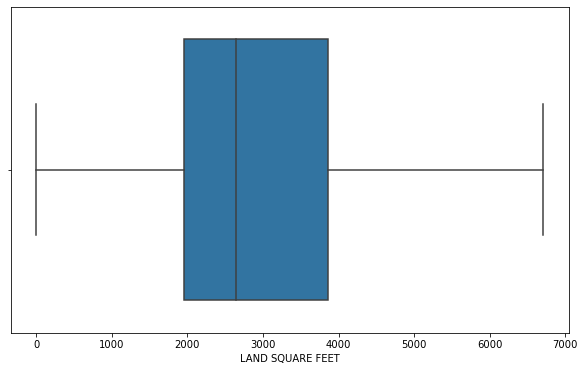

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x='LAND SQUARE FEET', data=df,showfliers=False)

In [26]:
# Keeping only required rows based on area
df = df[df['GROSS SQUARE FEET'] < 10000]
df = df[df['LAND SQUARE FEET'] < 10000]

In [27]:
df.shape

(38342, 19)

In [28]:
del df['ADDRESS']
del df['APARTMENT NUMBER']

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38342 entries, 3 to 84545
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         38342 non-null  category
 1   NEIGHBORHOOD                    38342 non-null  object  
 2   BUILDING CLASS CATEGORY         38342 non-null  object  
 3   TAX CLASS AT PRESENT            38342 non-null  category
 4   BLOCK                           38342 non-null  int64   
 5   LOT                             38342 non-null  int64   
 6   BUILDING CLASS AT PRESENT       38342 non-null  object  
 7   ZIP CODE                        38342 non-null  int64   
 8   RESIDENTIAL UNITS               38342 non-null  int64   
 9   COMMERCIAL UNITS                38342 non-null  int64   
 10  TOTAL UNITS                     38342 non-null  int64   
 11  LAND SQUARE FEET                38342 non-null  float64 
 12  GROSS SQUARE FEET 

In [30]:
numeric_data.columns

Index(['BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'SALE PRICE'],
      dtype='object')

In [32]:
# Transforming the numeric features using log(x + 1)

from scipy.stats import skew
skewed = df[numeric_data.columns].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
df[skewed] = np.log1p(df[skewed])

In [33]:
# Normalising the numerical columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[numeric_data.columns])
scaled = scaler.transform(df[numeric_data.columns])

for i, col in enumerate(numeric_data.columns):
       df[col] = scaled[:,i]

In [34]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,-1.552838,-0.871424,C4,-1.442057,3.592461,-0.210487,4.083993,-0.332369,3.247655,0.176451,2,C4,2.478171
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,-1.545023,-0.654228,C4,-1.442057,3.238031,-0.210487,3.668144,-0.669316,1.421318,0.191071,2,C4,2.174164
76,1,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,-1.584890,1.174680,R2,-1.442057,-0.463263,-0.210487,-0.674540,0.691653,1.183694,-3.818937,2,R2,-0.206132
79,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,-1.611925,1.175214,R4,-1.442057,-0.463263,-0.210487,-0.674540,0.691653,1.183694,0.191071,2,R4,0.094653
80,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,-1.611925,1.175747,R4,-1.442057,-0.463263,-0.210487,-0.674540,0.691653,1.183694,0.191071,2,R4,0.113914


In [35]:
# Dropping columns not useful
del df['BUILDING CLASS AT PRESENT']
del df['BUILDING CLASS AT TIME OF SALE']
del df['NEIGHBORHOOD']

In [36]:
df.shape

(38342, 14)

In [37]:
# Selecting the variables to be one-hot encoded
one_hot_columns = ['BOROUGH', 'BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','TAX CLASS AT TIME OF SALE']

In [38]:
# Convert categorical variables into dummy/indicator variables (i.e. one-hot encoding).

one_hot_encoded = pd.get_dummies(df[one_hot_columns])
one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38342 entries, 3 to 84545
Data columns (total 56 columns):
 #   Column                                                                Non-Null Count  Dtype
---  ------                                                                --------------  -----
 0   BOROUGH_1                                                             38342 non-null  uint8
 1   BOROUGH_2                                                             38342 non-null  uint8
 2   BOROUGH_3                                                             38342 non-null  uint8
 3   BOROUGH_4                                                             38342 non-null  uint8
 4   BOROUGH_5                                                             38342 non-null  uint8
 5   BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS                       38342 non-null  uint8
 6   BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS                       38342 non-null  uint8
 7   BUILDING CLAS

In [39]:
# Replacing categorical columns with dummies

fdf = df.drop(one_hot_columns,axis=1)
fdf = pd.concat([fdf, one_hot_encoded] ,axis=1)

In [40]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38342 entries, 3 to 84545
Data columns (total 66 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   BLOCK                                                                 38342 non-null  float64
 1   LOT                                                                   38342 non-null  float64
 2   ZIP CODE                                                              38342 non-null  float64
 3   RESIDENTIAL UNITS                                                     38342 non-null  float64
 4   COMMERCIAL UNITS                                                      38342 non-null  float64
 5   TOTAL UNITS                                                           38342 non-null  float64
 6   LAND SQUARE FEET                                                      38342 non-null  float64


In [41]:
fdf.head()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,...,TAX CLASS AT PRESENT_2,TAX CLASS AT PRESENT_2A,TAX CLASS AT PRESENT_2B,TAX CLASS AT PRESENT_2C,TAX CLASS AT PRESENT_3,TAX CLASS AT PRESENT_4,TAX CLASS AT TIME OF SALE_1,TAX CLASS AT TIME OF SALE_2,TAX CLASS AT TIME OF SALE_3,TAX CLASS AT TIME OF SALE_4
3,-1.552838,-0.871424,-1.442057,3.592461,-0.210487,4.083993,-0.332369,3.247655,0.176451,2.478171,...,0,0,1,0,0,0,0,1,0,0
6,-1.545023,-0.654228,-1.442057,3.238031,-0.210487,3.668144,-0.669316,1.421318,0.191071,2.174164,...,0,0,1,0,0,0,0,1,0,0
76,-1.584890,1.174680,-1.442057,-0.463263,-0.210487,-0.674540,0.691653,1.183694,-3.818937,-0.206132,...,1,0,0,0,0,0,0,1,0,0
79,-1.611925,1.175214,-1.442057,-0.463263,-0.210487,-0.674540,0.691653,1.183694,0.191071,0.094653,...,1,0,0,0,0,0,0,1,0,0
80,-1.611925,1.175747,-1.442057,-0.463263,-0.210487,-0.674540,0.691653,1.183694,0.191071,0.113914,...,1,0,0,0,0,0,0,1,0,0


In [42]:
Y_fdf = fdf['SALE PRICE']
X_fdf = fdf.drop('SALE PRICE', axis=1)

X_fdf.shape , Y_fdf.shape

((38342, 65), (38342,))

In [43]:
# Train Test Split

from sklearn.model_selection import train_test_split 
X_train ,X_test, Y_train , Y_test = train_test_split(X_fdf , Y_fdf , test_size = 0.2 , random_state = 1)

In [44]:
# Training set

X_train.shape , Y_train.shape

((30673, 65), (30673,))

In [45]:
# Testing set

X_test.shape , Y_test.shape

((7669, 65), (7669,))

In [46]:
# RMSE
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

In [47]:
# Modelling the Data

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

In [48]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)

In [49]:
print("Linear Regression Mean Squared Error : "+str(rmse(Y_test, Y_pred_lr)))

Linear Regression Mean Squared Error : 0.7608322854188411


In [50]:
# Lasso Regression

alpha=0.00099
lasso_regr = Lasso(alpha=alpha,max_iter=50000)
lasso_regr.fit(X_train, Y_train)
Y_pred_lasso = lasso_regr.predict(X_test)

In [51]:
print("Lasso Regression Mean Squared Error : "+str(rmse(Y_test, Y_pred_lasso)))

Lasso Regression Mean Squared Error : 0.7624527876466052


In [52]:
# Random Forest Regression

rfr = RandomForestRegressor(n_estimators = 100, random_state = 1)
rfr.fit(X_train, Y_train)
Y_pred_rf = rfr.predict(X_test)

In [53]:
print("Random Forest Regression Mean Squared Error : "+str(rmse(Y_test, Y_pred_rf)))

Random Forest Regression Mean Squared Error : 0.5718830328425754


In [55]:
r2_score(Y_test, Y_pred_lr)

0.42957522339351073

In [56]:
r2_score(Y_test, Y_pred_lasso)

0.4271427318835759

In [57]:
r2_score(Y_test, Y_pred_rf)

0.6777188254777636